# Data Visualization Project on Bundesliga Current Players

## 1. Read Essential Libraries

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

## 2. Read Data

In [6]:
Bundesliga = pd.read_csv('Bundesliga.csv').drop('Unnamed: 0', axis=1)

In [14]:
Bundesliga.iloc[:10,]

,Player,Value,Age,Position,Number,Club,Citizenship
0,Jadon Sancho,108.0,19,Right Winger,7,borussia-dortmund,England
1,Kai Havertz,81.0,20,Attacking Midfield,29,bayer-04-leverkuse,Germany
2,Serge Gnabry,72.0,24,Right Winger,22,fc-bayern-munchen,Germany
3,Joshua Kimmich,72.0,24,Right-Back,32,fc-bayern-munchen,Germany
4,Timo Werner,67.5,23,Centre-Forward,11,rasenballsport-leipzig,Germany
5,Robert Lewandowski,63.0,31,Centre-Forward,9,fc-bayern-munchen,Poland
6,Philippe Coutinho,63.0,27,Attacking Midfield,10,fc-bayern-munchen,Brazil
7,Lucas Hernández,63.0,23,Centre-Back,21,fc-bayern-munchen,France
8,David Alaba,58.5,27,Left-Back,27,fc-bayern-munchen,Austria
9,Thiago,54.0,28,Central Midfield,6,fc-bayern-munchen,Spain


## 3. Data Visualization

#### 10 Most Expensive Players in Bundesliga

In [15]:
Bundesliga.iloc[:10,]

,Player,Value,Age,Position,Number,Club,Citizenship
0,Jadon Sancho,108.0,19,Right Winger,7,borussia-dortmund,England
1,Kai Havertz,81.0,20,Attacking Midfield,29,bayer-04-leverkuse,Germany
2,Serge Gnabry,72.0,24,Right Winger,22,fc-bayern-munchen,Germany
3,Joshua Kimmich,72.0,24,Right-Back,32,fc-bayern-munchen,Germany
4,Timo Werner,67.5,23,Centre-Forward,11,rasenballsport-leipzig,Germany
5,Robert Lewandowski,63.0,31,Centre-Forward,9,fc-bayern-munchen,Poland
6,Philippe Coutinho,63.0,27,Attacking Midfield,10,fc-bayern-munchen,Brazil
7,Lucas Hernández,63.0,23,Centre-Back,21,fc-bayern-munchen,France
8,David Alaba,58.5,27,Left-Back,27,fc-bayern-munchen,Austria
9,Thiago,54.0,28,Central Midfield,6,fc-bayern-munchen,Spain


#### 10 Most Expensive German Players in Bundesliga

In [16]:
Bundesliga[Bundesliga.Citizenship == 'Germany'].reset_index(drop = 'True').loc[:9]

,Player,Value,Age,Position,Number,Club,Citizenship
0,Kai Havertz,81.0,20,Attacking Midfield,29,bayer-04-leverkuse,Germany
1,Serge Gnabry,72.0,24,Right Winger,22,fc-bayern-munchen,Germany
2,Joshua Kimmich,72.0,24,Right-Back,32,fc-bayern-munchen,Germany
3,Timo Werner,67.5,23,Centre-Forward,11,rasenballsport-leipzig,Germany
4,Niklas Süle,54.0,24,Centre-Back,4,fc-bayern-munchen,Germany
5,Leon Goretzka,45.0,24,Central Midfield,18,fc-bayern-munchen,Germany
6,Julian Brandt,45.0,23,Attacking Midfield,19,borussia-dortmund,Germany
7,Marco Reus,36.0,30,Attacking Midfield,11,borussia-dortmund,Germany
8,Jonathan Tah,33.3,23,Centre-Back,4,bayer-04-leverkuse,Germany
9,Lukas Klostermann,31.5,23,Right-Back,16,rasenballsport-leipzig,Germany


#### Descriptive Statistics of Age

In [6]:
Bundesliga.Age.describe()

count    532.000000
mean      25.195489
std        4.439098
min       17.000000
25%       22.000000
50%       25.000000
75%       28.000000
max       41.000000
Name: Age, dtype: float64

#### The distribution of 534 Players Age

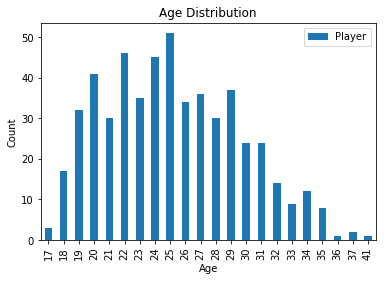

In [7]:
Bundesliga.groupby('Age')[['Player']].count().plot.bar()
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

#### Average Age of 18 Clubs

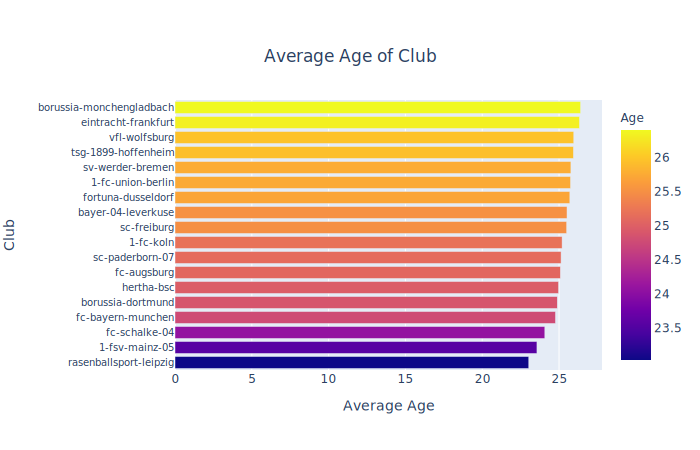

In [22]:
import plotly.express as px
Avgage = Bundesliga.groupby('Club')[['Age']].mean().sort_values('Age').reset_index()
fig = px.bar(Avgage,'Age','Club',orientation='h', color = 'Age',
             title=dict(text='Average Age of Club',xanchor='center',yanchor='top',x=0.5))
fig.update_layout(xaxis= dict(title='Average Age'), 
                  yaxis = dict(title = 'Club',tickfont = dict(size = 10),exponentformat = 'e'))
fig.show('svg')

#### Total Players Value of 18 Clubs

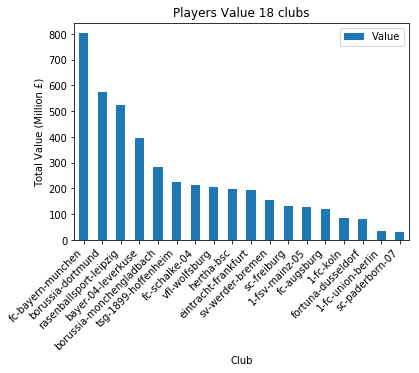

In [23]:
Bundesliga.groupby('Club')[['Value']].sum().sort_values('Value',ascending = False).plot.bar()
plt.ylabel('Total Value (Million £)')
plt.title('Players Value 18 clubs')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Players Nationality

In [14]:
# Number of Countries who have players in Bundesliga
print('Players come from '+str(len(Bundesliga.groupby('Citizenship')[['Player']].count().sort_values('Player',ascending = False).reset_index()))+' Countries')

Players come from 59 Countries


#### Top 10 Countries provide players to Bundesliga (Except Germany)

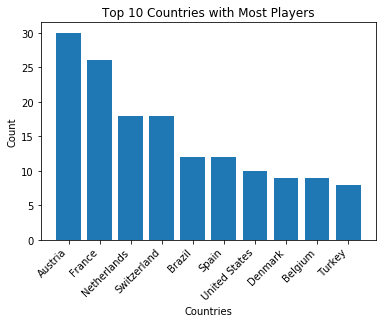

In [31]:
country = Bundesliga.groupby('Citizenship')[['Player']].count().sort_values('Player',ascending = False).reset_index()
plt.bar('Citizenship','Player',data=country.iloc[1:11,])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Top 10 Countries with Most Players')
plt.show()

#### Visualize it on a map

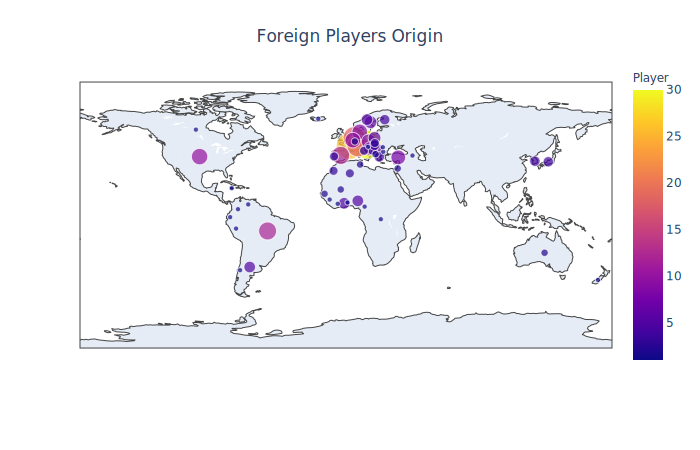

In [37]:
fig = px.scatter_geo(country.iloc[1:],locations="Citizenship",locationmode = 'country names',color="Player",size='Player')
fig.update_layout(title = {'text':'Foreign Players Origin','xanchor':'center','yanchor':'top','x':0.5})
fig.show('svg')